Network  Intrusion Detector

Task: Deteck Network Intrusions

1 - Supervised Classification | 2 - Intrusions as Outlier

1 - Supervised Classification by applying tools such as Pandas, Numpy, Scikit-Learn

- Data Loading
- Data cleansing
- Data exploration
- Train supervised ML model
- Model evaluation

In [35]:
#download data
#get the data
!git clone https://github.com/keuperj/DATA.git

fatal: destination path 'DATA' already exists and is not an empty directory.


In [36]:
# import needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [37]:
# read data
train_df = pd.read_csv("DATA/outlier_train_data.csv",header=None)
test = pd.read_csv("DATA/outlier_test_data.csv",header=None)

In [38]:
# view data shape
print(train_df.shape)

(494021, 42)


In [39]:
# view first 5 rows
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [40]:
#check for missing values
train_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

In [41]:
#split train data for X and y
y_train =np.array(train)[:,-1]
X_train =np.array(train)[:,4:-1]

y_test=np.array(test)[:,-1]
X_test=np.array(test)[:,4:-1]

In [42]:
y_train

array(['normal.', 'normal.', 'normal.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object)

In [43]:
# encode label as number
le = preprocessing.LabelEncoder()
le.fit(y_train)
list(le.classes_)

['back.',
 'buffer_overflow.',
 'ftp_write.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'land.',
 'loadmodule.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'perl.',
 'phf.',
 'pod.',
 'portsweep.',
 'rootkit.',
 'satan.',
 'smurf.',
 'spy.',
 'teardrop.',
 'warezclient.',
 'warezmaster.']

In [44]:
# transform label into number
y_num = le.transform(y_train)
y_num

array([11, 11, 11, ..., 11, 11, 11])

11 = "normal"

(array([2.24100e+03, 6.50000e+01, 1.26800e+03, 1.60000e+01, 1.07432e+05,
        9.72850e+04, 1.30400e+03, 1.59900e+03, 2.80792e+05, 2.01900e+03]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

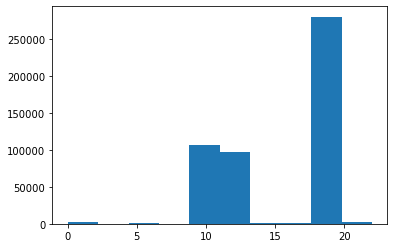

In [45]:
# view y_num graph
plt.hist(y_num)

In [46]:
# binary classification
y_train=y_num==11
y_train=y.astype(int)

y_test=y_test=='normal.'
y_test=y_test.astype(int)

To classify between only two mutually exclusive classes

*.astype = change the data type of a numpy array


(array([396743.,  97278.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

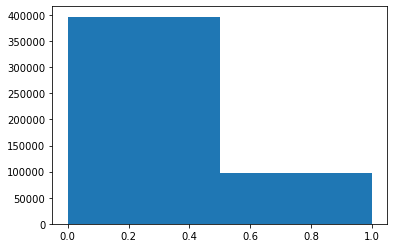

In [47]:
# view y_train graph
plt.hist(y_train,2)

(array([250436.,  60593.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

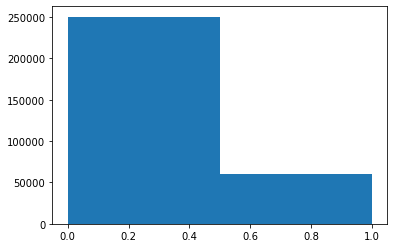

In [48]:
#view y_test graph
plt.hist(y_test,2)

Now, only 2 class labels left which are "normal" and others

In [49]:
# build model with random forest
rf = RandomForestClassifier( )
rf.fit(X,y)

RandomForestClassifier()

In [50]:
# evaluate training model
rf.score(X_train,y_train)

0.9999979757945513

In [51]:
# evaluate testing model
rf.score(X_test,y_test)

0.9276241122210469

In [52]:
# predict training model
pred_train = rf.predict(X_train)
confusion_matrix(y_train, pred_train)

array([[396743,      0],
       [     1,  97277]])

In [53]:
# predict testing model
pred_test = rf.predict(X_test)
confusion_matrix(y_test, pred_test)

array([[228233,  22203],
       [   308,  60285]])

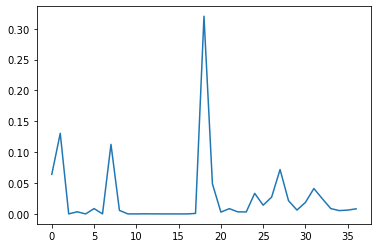

In [54]:
#get feature importance
plt.plot(rf.feature_importances_)

2 - Intrusions as Outlier

Use the train data WITHOUT the lables and train an Isolation Forest.

- Check and plot statistics of the isolation values
- Find a threshold to select outliers
- Evaluate this approach with the test data

In [56]:
#index of all "normal" samples
normal_index=y_train==1 

#add some random "bad" outliers
rand_index=np.random.randint(500)
normal_index[rand_index]=True

In [57]:
# train isolation forest
from sklearn.ensemble import IsolationForest

#use X_train from random forest
clf = IsolationForest().fit(X_train[normal_index])

(array([   473., 101842.,   7058.,   1549., 284885.,   5525.,   5821.,
         13361.,  15373.,  58134.]),
 array([-0.7594591 , -0.71552617, -0.67159324, -0.6276603 , -0.58372737,
        -0.53979444, -0.49586151, -0.45192858, -0.40799564, -0.36406271,
        -0.32012978]),
 <BarContainer object of 10 artists>)

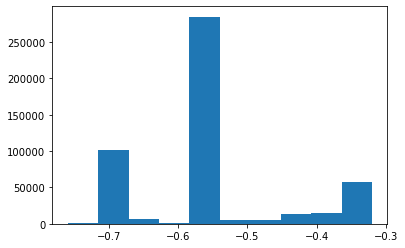

In [59]:
# view scores graph
scores=clf.score_samples(X)
plt.hist(scores)

In [61]:
#setthreshold to -0.45
scores[scores<-0.45]=0 

scores[scores<0]=1

Decision threshold, allows us to map the sigmoid output of a binary classification to a binary category. Thus raising the classification threshold typically increases precision

In [62]:
np.sum(scores)

86575.0

In [63]:
confusion_matrix(y, scores)

array([[394825,   1918],
       [ 12621,  84657]])